# 0. Importing packages

In [1]:
# Load the autoreload extension to automatically reload modules before executing code (to avoid restarting the kernel)
%load_ext autoreload 
# NB. uncomment the line above first time you run this cell
%autoreload 2

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from resources.network_functions import NetworkEdgeListConstructor, GraphConstructor, NetworkVisualizer

## 0.1 File Paths

In [2]:
### File path ###
fp_main = Path('/Volumes/SAM-SODAS-DISTRACT/Coding Distraction/github_as_market_device')
fp_main_output = Path(fp_main / 'output')

# 1 Load in data

In [3]:
# Read in the data
github_data = pd.read_parquet(fp_main_output / 'unique_users_first_second.gzip.parquet')
github_data

,user_login,search_with_company,listed_company,inferred_company,matched_company_strings,usertype,email,location,bio,blog,...,follows_in,follows_out,watches_in,watches_out,stars_in,stars_out,forks_in,forks_out,unique_ties,tier
0,NodesAMS,nodes,Nodes Agency,nodes,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,None,[CPH],Nodes \r\nApplication Management Service,https://www.nodesagency.com,...,[],[],[],[],[],[],[],"[{'created_at': '2022-10-14', 'owner_login': '...",[ml-opensource],1
1,nodes-checkout,nodes,Nodes.dk,nodes,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,cw@nodes.dk,"[dk, dk, dk, Copenhagen, Denmark]",None,http://www.nodes.dk/,...,[],[],[],"[{'created_at': '2015-01-29', 'owner_login': '...",[],[],[],[],[ml-archive],1
2,nodes-team,nodes,Nodes Agency,nodes,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,None,[Copenhagen],None,http://nodesagency.com,...,[],[],[],"[{'created_at': '2016-03-27', 'owner_login': '...",[],[],[],[],[ml-archive],1
3,abtion,abtion,None,abtion,"{'abtion': ['abtion', 'iwanttowork@abtion.com'...",Organization,iwanttowork@abtion.com,[Copenhagen],Not another digital agency,https://abtion.com,...,"[{'created_at': '2014-01-12', 'owner_login': '...",[],"[{'created_at': '2012-02-23', 'owner_login': '...",[],"[{'created_at': '2015-08-26', 'owner_login': '...",[],"[{'created_at': '2025-05-05', 'owner_login': '...","[{'created_at': '2020-12-10', 'owner_login': '...","[karuncs, heatherm, runephilosof, jekyll, Geof...",1
4,hcarreras,abtion,Abtion,abtion,"{'abtion': ['abtion', 'hc@abtion.com', 'abtion...",User,hc@abtion.com,[Copenhagen],None,abtion.com,...,"[{'created_at': '2009-07-02', 'owner_login': '...","[{'created_at': '2008-03-31', 'owner_login': '...","[{'created_at': '2014-11-04', 'owner_login': '...","[{'created_at': '2010-10-26', 'owner_login': '...","[{'created_at': '2014-01-01', 'owner_login': '...","[{'created_at': '2018-05-31', 'owner_login': '...","[{'created_at': '2015-05-06', 'owner_login': '...","[{'created_at': '2018-04-13', 'owner_login': '...","[PartidoDeInternet, bureson, tareksamni, knoop...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,othorsager,strømlin,Knowit,knowit,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,ole.thorsager@knowit.dk,"[dk, Denmark]",None,,...,"[{'created_at': '2011-07-12', 'owner_login': '...",[],[],"[{'created_at': '2017-10-12', 'owner_login': '...",[],[],[],[],None,2
479,Baarsgaard,systematic,Systematic,systematic,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,None,"[Aarhus, Denmark]",None,,...,"[{'created_at': '2009-08-09', 'owner_login': '...","[{'created_at': '2008-11-07', 'owner_login': '...","[{'created_at': '2015-12-14', 'owner_login': '...","[{'created_at': '2020-09-30', 'owner_login': '...","[{'created_at': '2017-06-05', 'owner_login': '...","[{'created_at': '2025-04-30', 'owner_login': '...","[{'created_at': '2024-06-01', 'owner_login': '...","[{'created_at': '2024-09-29', 'owner_login': '...",None,2
480,bruunand,trifork,Trifork A/S,trifork,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,anders@bruun.dev,"[Aalborg, Denmark]",None,https://bruun.dev,...,"[{'created_at': '2012-02-21', 'owner_login': '...","[{'created_at': '2012-02-21', 'owner_login': '...","[{'created_at': '2015-10-06', 'owner_login': '...","[{'created_at': '2015-10-06', 'owner_login': '...","[{'created_at': '2012-02-21', 'owner_login': '...","[{'created_at': '2024-12-26', 'owner_login': '...","[{'created_at': '2019-02-13', 'owner_login': '...","[{'created_at': '2024-04-24', 'owner_login': '...",None,2
481,hejoTV2,tv2,TV 2 Danmark,tv2,"{'abtion': None, 'capgemini': None, 'cbrain': ...",User,hejo@tv2.dk,"[danmark, dk, Copenhagen]",Senior Database Developer\r\nMCSE: Data Manage...,,...,[],"[{'created_at': '2012-03-20', 'owner_login': '...",[],"[{'created_at': '2025-01-06', 'owner_login': '...",[],[],[],[],None,2


In [4]:
constructor = NetworkEdgeListConstructor(github_data)
all_edges_user_level, attention_edges_user_level, collaboration_edges_user_level = constructor.get_edge_lists()
print(f'Number of edges in the user-level network: {len(all_edges_user_level)}')
print(f'Number of attention edges in the user-level network: {len(attention_edges_user_level)}')
print(f'Number of collaboration edges in the user-level network: {len(collaboration_edges_user_level)}')

# Save the edgelist using gzip parquet
all_edges_user_level.to_parquet(fp_main_output / 'all_edges_user_level.gzip.parquet')
attention_edges_user_level.to_parquet(fp_main_output / 'attention_edges_user_level.gzip.parquet')
collaboration_edges_user_level.to_parquet(fp_main_output / 'collaboration_edges_user_level.gzip.parquet')

Number of edges in the user-level network: 4733
Number of attention edges in the user-level network: 4627
Number of collaboration edges in the user-level network: 106


In [5]:
gc_attention = GraphConstructor(all_edges_user_level, graph_type='attention')
attention_graph = gc_attention.get_graph()
print("Attention Graph edges:", attention_graph.edges())

gc_collaboration = GraphConstructor(all_edges_user_level, graph_type='collaboration')
collaboration_graph = gc_collaboration.get_graph()
print('\nCollaboration Graph edges:', collaboration_graph.edges())

Attention Graph edges: [('eg a s', 'eg a s'), ('eg a s', 'skat'), ('nuuday', 'shape'), ('nuuday', 'nuuday'), ('nuuday', 'jobindex'), ('nuuday', 'deondigital'), ('codefort', 'codefort'), ('immeo', 'immeo'), ('shape', 'shape'), ('shape', 'ørsted'), ('shape', 'systematic'), ('shape', 'nuuday'), ('snapp', 'snapp'), ('systematic', 'systematic'), ('systematic', 'tv2'), ('systematic', 'skat'), ('systematic', 'relatel'), ('uptime', 'uptime'), ('uptime', 'must'), ('uptime', 'systematic'), ('reepay', 'reepay'), ('kmd', 'kmd'), ('kmd', 'skat'), ('ffw', 'ffw'), ('netcompany', 'signifly'), ('netcompany', 'netcompany'), ('netcompany', 'knowit'), ('netcompany', 'pentia'), ('netcompany', 'skat'), ('netcompany', 'delegateas'), ('netcompany', 'trifork'), ('netcompany', 'systematic'), ('fellowmind', 'fellowmind'), ('house of code', 'pentia'), ('house of code', 'house of code'), ('creuna', 'creuna'), ('cbrain', 'jobindex'), ('cbrain', 'delegateas'), ('cbrain', 'cbrain'), ('saxo bank', 'saxo bank'), ('skat

Plotting Attention Graph
Plot saved as attention_graph.png


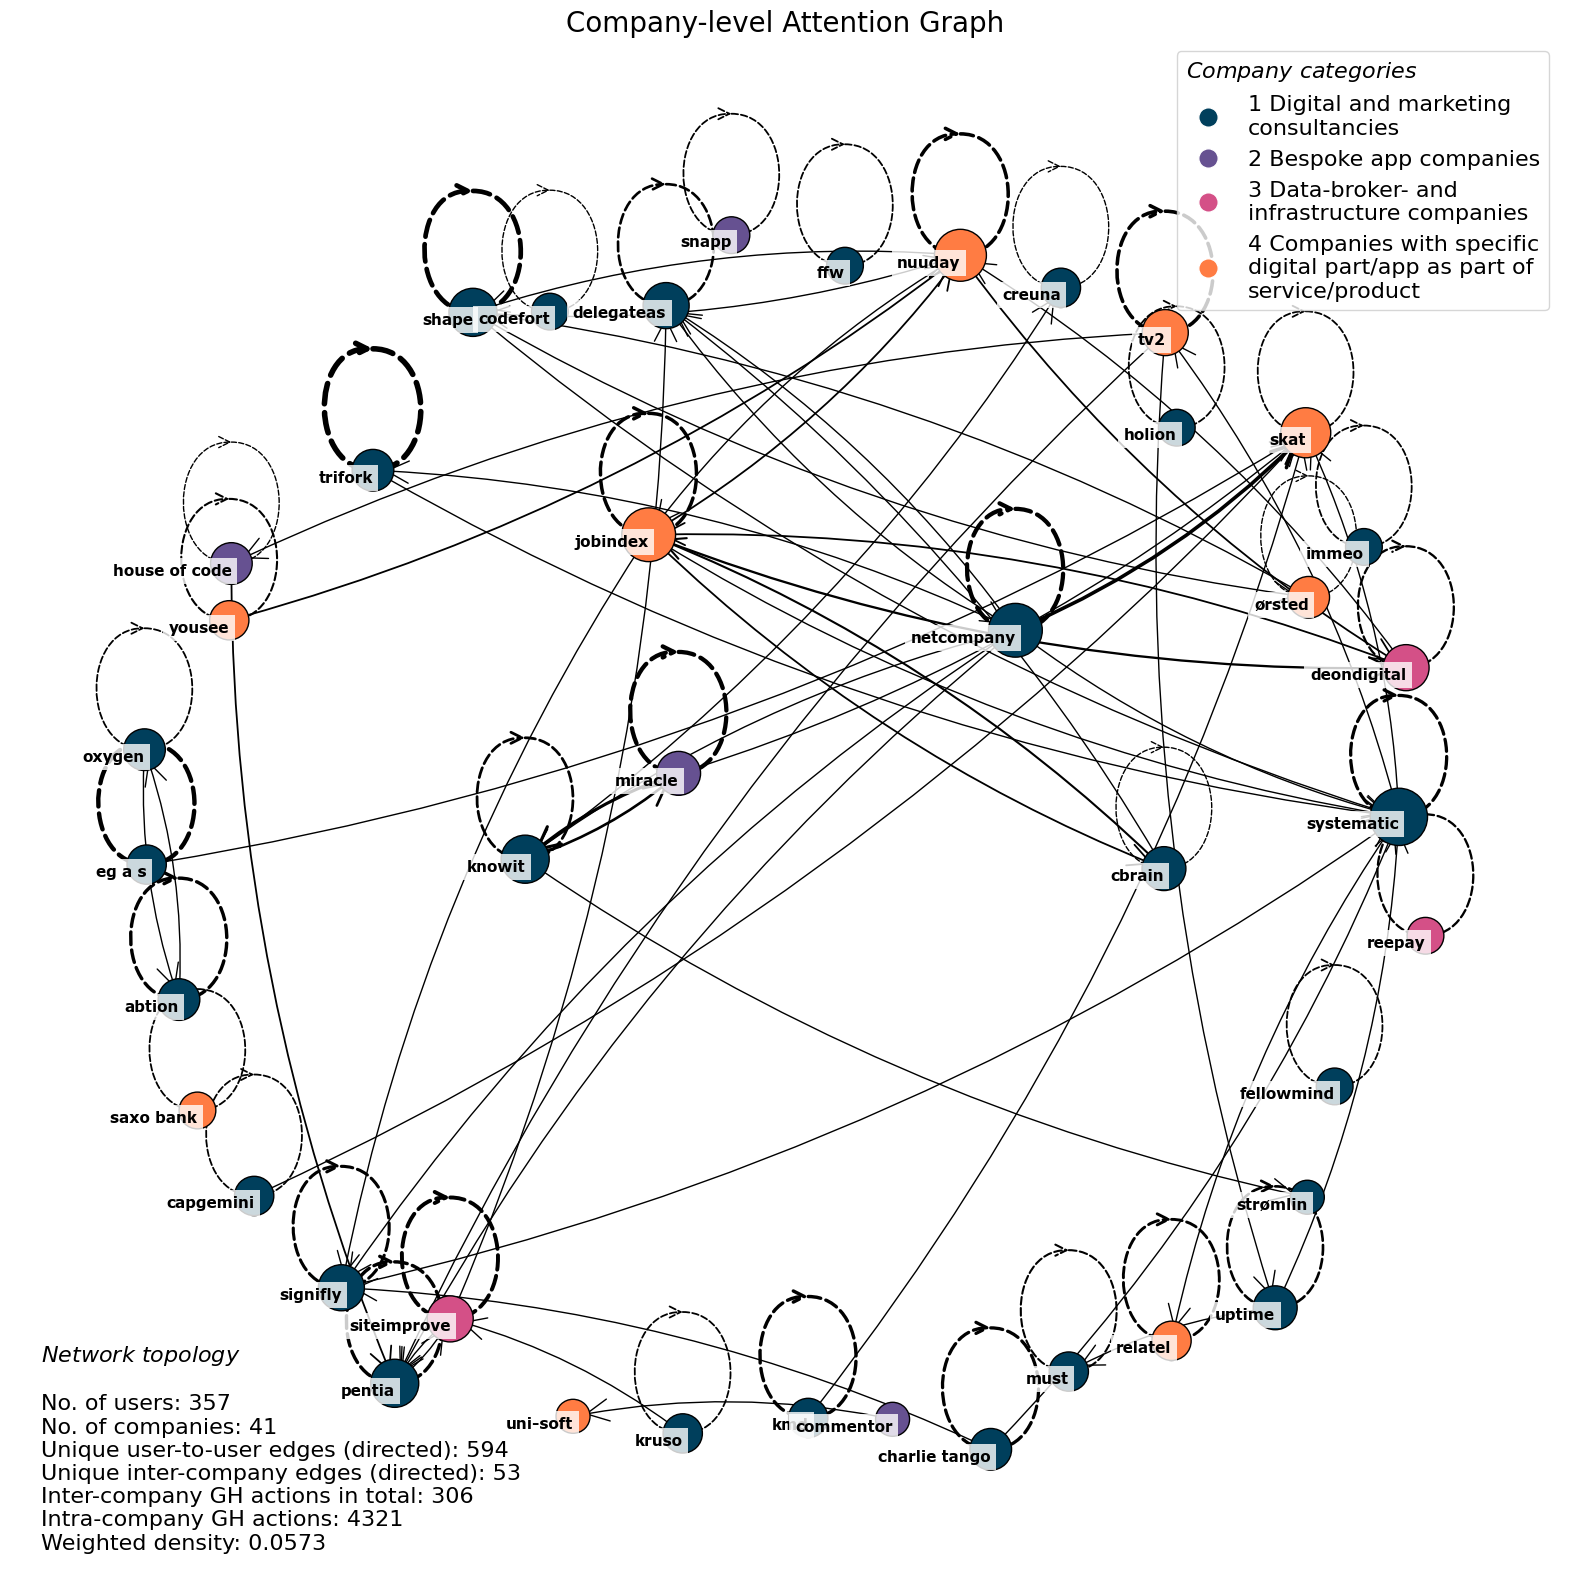

Plotting Collaboration Graph
Plot saved as collaboration_graph.png


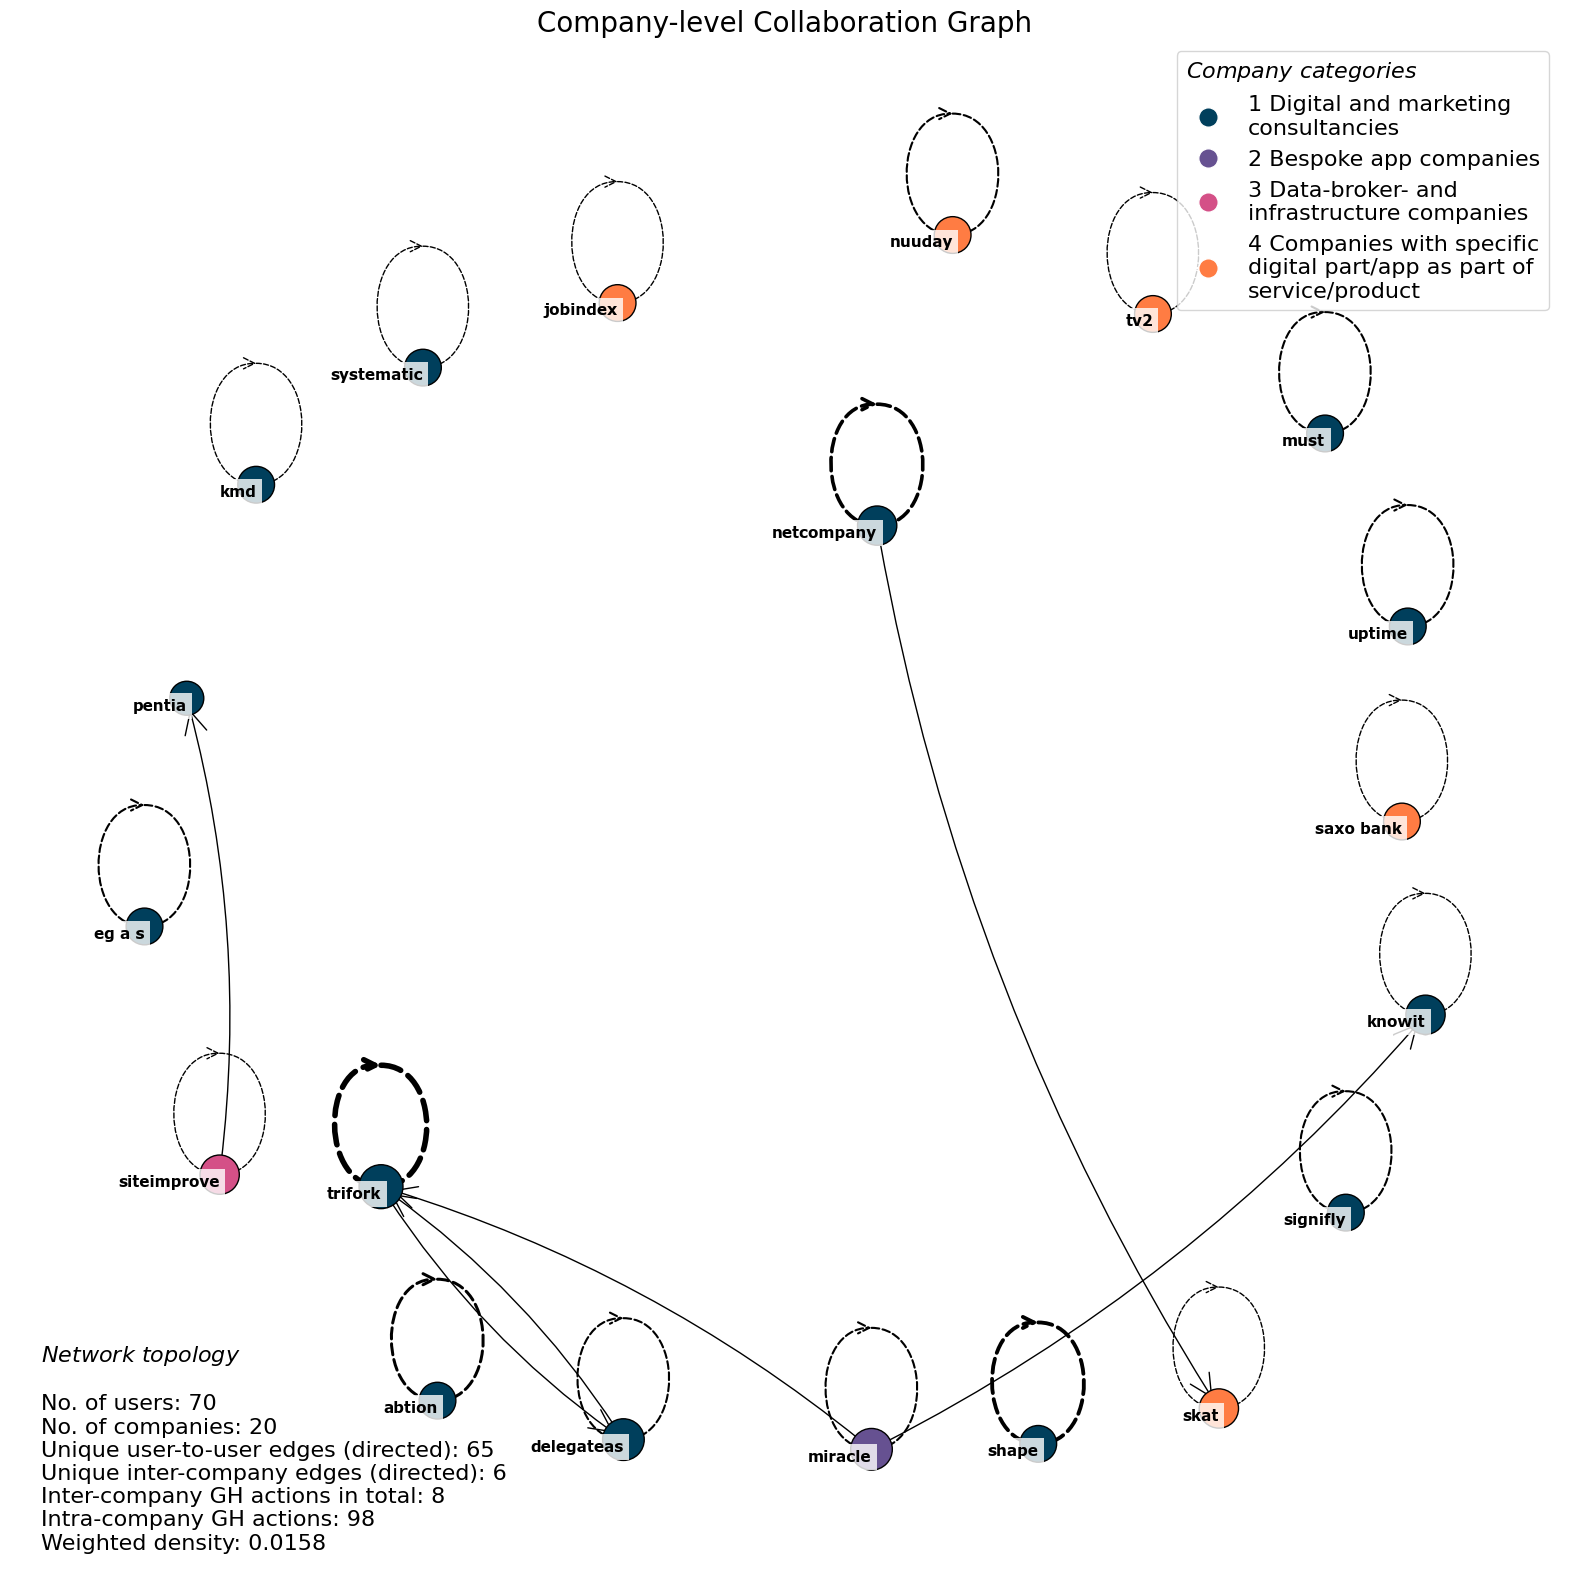

In [6]:
# Visualize Attention Graph
attention_viz = NetworkVisualizer(attention_graph, edgelist=all_edges_user_level, graph_type='attention')

print("Plotting Attention Graph")
fig_attention = attention_viz.create_plot(title="Company-level Attention Graph");
attention_viz.save_plot_as_png(fig_attention, 'attention_graph.png')
plt.show()

# Visualize Collaboration Graph
collab_viz = NetworkVisualizer(collaboration_graph, edgelist=all_edges_user_level, graph_type='collaboration')

print("Plotting Collaboration Graph")
fig_collab = collab_viz.create_plot(title="Company-level Collaboration Graph");
collab_viz.save_plot_as_png(fig_collab, 'collaboration_graph.png')
plt.show()
